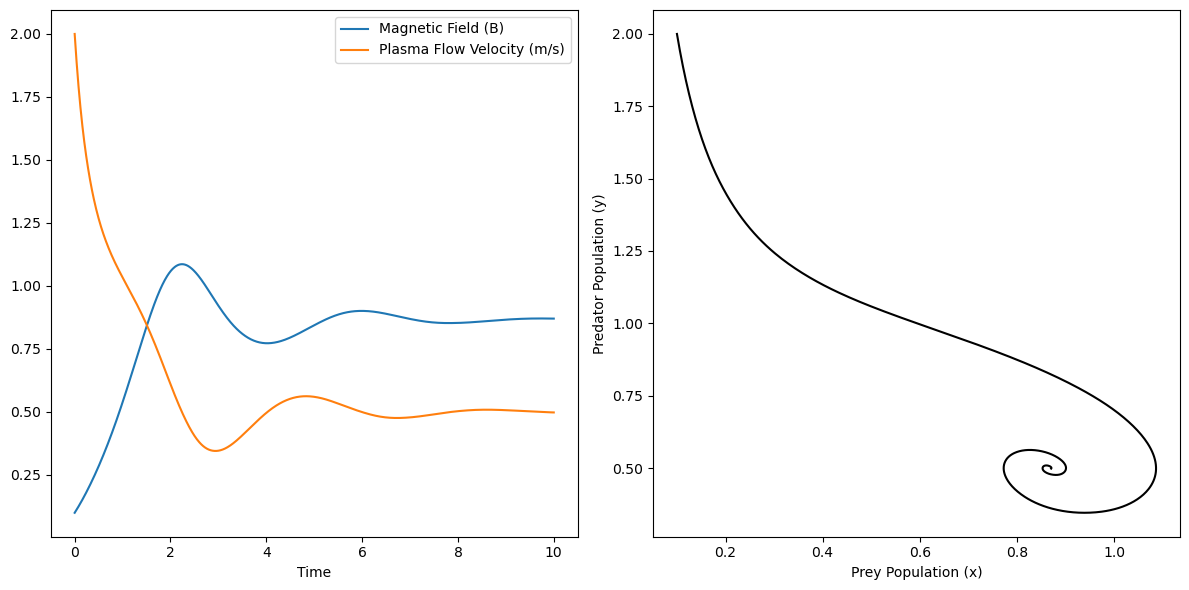

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


def solar(t, y, a, c):
    B, v = y    # B is mag field, v is plasma flow velocity
    dBdt = -a*B + 2*B*v
    dvdt = c - B**2 - v**2
    dydt = np.array([dBdt, dvdt])
    return dydt

# define a lambda function in a proper program that takes these arguments
lfun = lambda t, y, : solar(t, y, a, c)

# Define the initial parameters
B0 = 0.1  # initial position
v0 = 2  # initial velocity
y0 = (B0, v0)  # initial state
t0 = 0  # initial time

a = 1
c = 1

# Define the final time and the number of time steps
tf = 10  # final time
n = 1001  # Number of points at which output will be evaluated

# Create an array of the time steps
t = np.linspace(t0, tf, n)  # Points at which output will be evaluated

# Calls the method integrate.solve_ivp()
result = integrate.solve_ivp(fun=lfun,  # The function defining the derivative
                             t_span=(t0, tf),  # Initial and final times
                             y0=y0,  # Initial state
                             method="RK45",  # Integration method
                             t_eval=t)  # Time points for result to be defined at

# Read the solution and time from the result array returned by Scipy
B, v = result.y
t = result.t



# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Plot prey and predator populations as a function of time
ax[0].plot(t, B, label=r"Magnetic Field (B)")
ax[0].plot(t, v, label=r"Plasma Flow Velocity (m/s)")
ax[0].set_xlabel(r"Time")
ax[0].legend(loc='upper right')

# Create a phase space plot (Predator vs Prey)
ax[1].plot(B, v, 'k')
#ax[1].axis('equal')
ax[1].set_xlabel(r"Prey Population (x)")
ax[1].set_ylabel(r"Predator Population (y)")

# Show the plot
plt.tight_layout()
plt.savefig("G5(i).svg", bbox_inches='tight')
plt.show()

C:\Users\niele\AppData\Local\Temp\ipykernel_23004\1351840526.py:21: RuntimeWarning: invalid value encountered in sqrt
  v_nullcline_positive = np.sqrt(c - B_vals**2)
C:\Users\niele\AppData\Local\Temp\ipykernel_23004\1351840526.py:22: RuntimeWarning: invalid value encountered in sqrt
  v_nullcline_negative = -np.sqrt(c - B_vals**2)


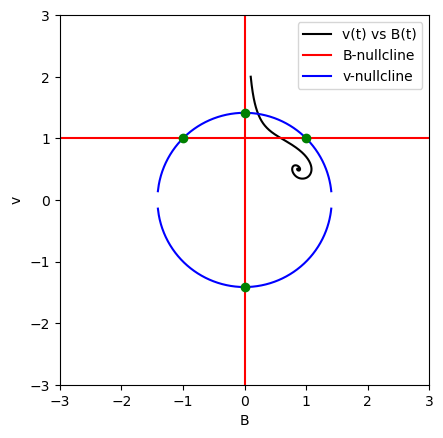

In [167]:
# Calculate and plot the nullclines
x_vals = np.linspace(-3, 3, 400)

# a=1 for 4 fixed points, a=3 for 2 fixed points
a = 2
c = 2

plt.plot(B, v, '-', color='black', label=r"v(t) vs B(t)")
plt.gca().set_aspect('equal', adjustable='box')  # Make plot box square


# B-nullcline: B = 0 (vertical line at B = 0)
plt.axvline(0, color='r', linestyle='-', label='B-nullcline')

# B-nullcline: v = a / 2 (horizontal line at v = a/2)
plt.axhline(a/2, color='r', linestyle='-')

# v-nullcline: B^2 + v^2 = c 
# Rearranging for v: v = sqrt(c - B^2) and v = -sqrt(c - B^2)
B_vals = np.linspace(-np.sqrt(c), np.sqrt(c), 400)
v_nullcline_positive = np.sqrt(c - B_vals**2)
v_nullcline_negative = -np.sqrt(c - B_vals**2)

plt.plot(B_vals, v_nullcline_positive, 'b-', label='v-nullcline')
plt.plot(B_vals, v_nullcline_negative, 'b-')

# Finding intersections
# Intersection of B = 0 and v-nullcline
B_intersection_1 = 0
v_intersection_1 = c ** 0.5

B_intersection_2 = 0
v_intersection_2 = -1 * c ** 0.5

# Intersection of v = a/2 and v-nullcline
B_intersection_3 = np.sqrt(c - (a / 2)**2)
v_intersection_3 = a / 2

# Intersection of v = a/2 and v-nullcline
B_intersection_4 = -1 * np.sqrt(c - (a / 2)**2)
v_intersection_4 = a / 2

# Collect intersection points
intersections = [
    (B_intersection_1, v_intersection_1),
    (B_intersection_2, v_intersection_2),
    (B_intersection_3, v_intersection_3),
    (B_intersection_4, v_intersection_4)
]

# Plot intersection points
for (B_int, v_int) in intersections:
    plt.plot(B_int, v_int, 'go')  # 'ko' means black circle
    #plt.annotate(f'({B_int:.2f}, {v_int:.2f})', (B_int, v_int), textcoords="offset points", xytext=(0,10), ha='center')

# Adding labels and title
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xlabel('B')
plt.ylabel('v')
plt.legend()
plt.show()

C:\Users\niele\AppData\Local\Temp\ipykernel_23004\2561145642.py:27: RuntimeWarning: invalid value encountered in sqrt
  v_nullcline_positive = np.sqrt(c - B_vals**2)
C:\Users\niele\AppData\Local\Temp\ipykernel_23004\2561145642.py:28: RuntimeWarning: invalid value encountered in sqrt
  v_nullcline_negative = -np.sqrt(c - B_vals**2)


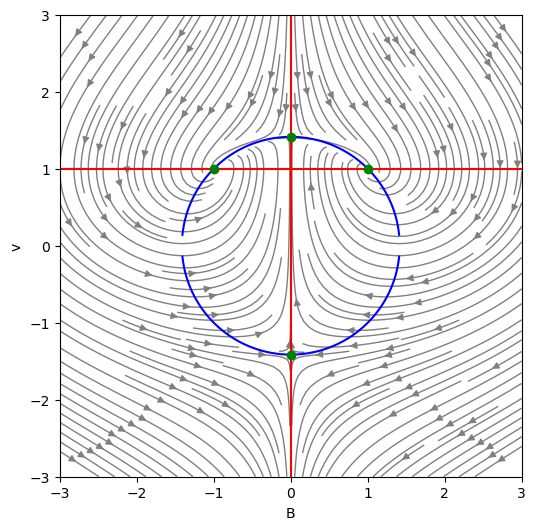

In [168]:
import matplotlib.pyplot as plt
import numpy as np

def main():
    plt.close('all')
    coords = np.linspace(-3, 3, 21)
    B, v = np.meshgrid(coords, coords)
    dB = -a*B + 2*B*v
    dv = c - B**2 - v**2
    plt.figure(figsize=(6,6))
    plt.gca().set_aspect('equal', adjustable='box')  # Make plot box square
    plt.xlabel('B')
    plt.ylabel('v')
    #plt.quiver(B, v, dB, dv, )  # plot field as quiver
    plt.streamplot(B, v, dB, dv, color='grey', linewidth=1, density=2)  # All streamlines in red
  # plot streamlines of field.
    
    # B-nullcline: B = 0 (vertical line at B = 0)
    plt.axvline(0, color='r', linestyle='-', label='B-nullcline')

    # B-nullcline: v = a / 2 (horizontal line at v = a/2)
    plt.axhline(a/2, color='r', linestyle='-')

    # v-nullcline: B^2 + v^2 = c 
    # Rearranging for v: v = sqrt(c - B^2) and v = -sqrt(c - B^2)
    B_vals = np.linspace(-np.sqrt(c), np.sqrt(c), 400)
    v_nullcline_positive = np.sqrt(c - B_vals**2)
    v_nullcline_negative = -np.sqrt(c - B_vals**2)

    plt.plot(B_vals, v_nullcline_positive, 'b-', label='v-nullcline')
    plt.plot(B_vals, v_nullcline_negative, 'b-')
    
    # Finding intersections
    # Intersection of B = 0 and v-nullcline
    B_intersection_1 = 0
    v_intersection_1 = c ** 0.5

    B_intersection_2 = 0
    v_intersection_2 = -1 * c ** 0.5

    # Intersection of v = a/2 and v-nullcline
    B_intersection_3 = np.sqrt(c - (a / 2)**2)
    v_intersection_3 = a / 2

    # Intersection of v = a/2 and v-nullcline
    B_intersection_4 = -1 * np.sqrt(c - (a / 2)**2)
    v_intersection_4 = a / 2

    # Collect intersection points
    intersections = [
        (B_intersection_1, v_intersection_1),
        (B_intersection_2, v_intersection_2),
        (B_intersection_3, v_intersection_3),
        (B_intersection_4, v_intersection_4)
    ]

    # Plot intersection points
    for (B_int, v_int) in intersections:
        plt.plot(B_int, v_int, 'go')  # 'ko' means black circle

    #plt.legend()
    plt.show()


# if this is the module called directly, then execute the main function, otherwise only define it
if __name__ == '__main__':
    main()

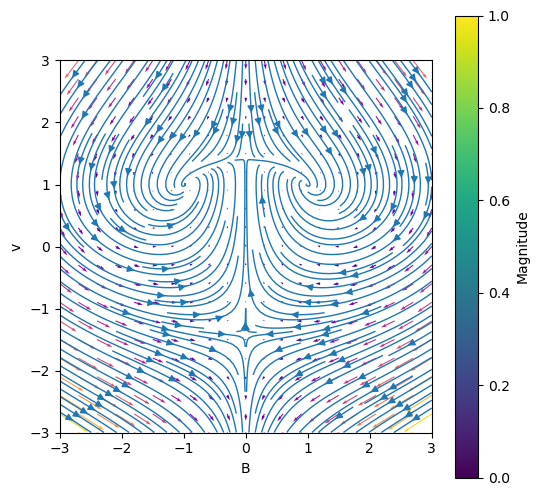

In [169]:
# code courtesy of Adam Dempsey
# modified for PHY1055 by Oisín Creaner
import matplotlib.pyplot as plt
import numpy as np

def main():
    plt.close('all')
    coords = np.linspace(-3, 3, 21)
    B, v = np.meshgrid(coords, coords)
    dB = -a*B + 2*B*v
    dv = c - B**2 - v**2

    # Calculate the magnitude of the vector field
    magnitude = np.sqrt(dB**2 + dv**2)

    plt.figure(figsize=(6,6))
    plt.gca().set_aspect('equal', adjustable='box')  # Make plot box square
    plt.xlabel('B')
    plt.ylabel('v')
    plt.quiver(B, v, dB, dv, magnitude, cmap='plasma')  # plot field as quiver
    plt.streamplot(B, v, dB, dv, linewidth=1, density=2)  # All streamlines in red
  
    # Add colorbar to indicate the vector field magnitude
    plt.colorbar(label='Magnitude')

    plt.show()


# if this is the module called directly, then execute the main function, otherwise only define it
if __name__ == '__main__':
    main()

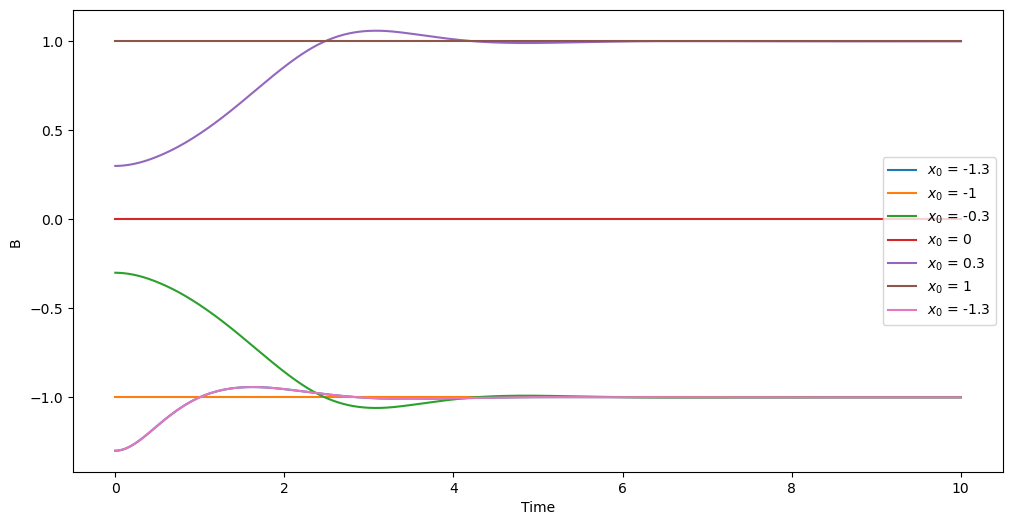

In [170]:
# Code courtesy of Adam Dempsey
# Modified for PHY1055 by Oisín Creaner

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


# Define the initial parameters
B0 = [-1.3, -1, -0.3, 0, 0.3, 1, -1.3]
v0 = 1   
t0 = 0  # Initial time

a = 2
c = 2  # Carrying capacity (should be greater than initial population)


# Define the final time and the number of time steps
tf = 10  # Final time
n = 1001  # Number of points at which output will be evaluated

# Creates an array of the time steps
t = np.linspace(t0, tf, n)  # Points at which output will be evaluated

plt.figure(figsize=(12, 6))

for i in B0:
    # Calls the method integrate.solve_ivp()
    result = integrate.solve_ivp(fun=lfun,  # The function defining the derivative
                                t_span=(t0, tf),  # Initial and final times
                                y0=[i, v0],  # Initial state (as a list)
                                method="RK45",  # Integration method
                                t_eval=t)  # Time points for result to be defined at

    # Read the solution and time from the result array returned by Scipy
    B_values = result.y[0]  # Extracting magnetic field values
    v_values = result.y[1]  # Extracting plasma flow velocity values
    t_values = result.t  # Time values
    
    plt.plot(t_values, B_values, label=f"$x_0$ = {i}")
'''
# lines to show stable points
array_of_zeros = np.zeros_like(t)
array_of_k = np.full_like(t, k)

plt.plot(t, array_of_zeros, color='black', linestyle='--', label='Fixed Points')
plt.plot(t, array_of_k, color='black', linestyle='--')

#plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # x' = 0 line
#plt.axhline(k, color='black', linewidth=0.5, linestyle='--')  # x' = 0 line
'''

# Create a plot for the population over time
#plt.plot(t, x, label=r"$x(t)$", color='blue')
plt.xlabel(r"Time")
plt.ylabel(r"B ")
#plt.title("Verhulst Population Growth Model")
#plt.axhline(y=k, color='red', linestyle='--', label='Carrying Capacity (K)')
plt.legend(loc='best')
#plt.savefig("G4(c).svg", bbox_inches='tight')
plt.show()


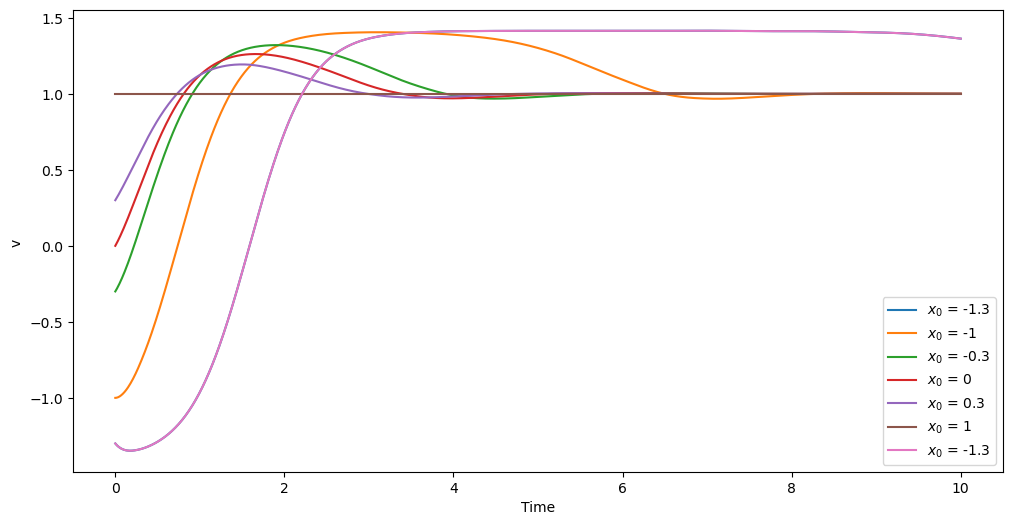

In [171]:
# Code courtesy of Adam Dempsey
# Modified for PHY1055 by Oisín Creaner

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


# Define the initial parameters
B0 = 1
v0 = [-1.3, -1, -0.3, 0, 0.3, 1, -1.3]  
t0 = 0  # Initial time

a = 2
c = 2  # Carrying capacity (should be greater than initial population)


# Define the final time and the number of time steps
tf = 10  # Final time
n = 1001  # Number of points at which output will be evaluated

# Creates an array of the time steps
t = np.linspace(t0, tf, n)  # Points at which output will be evaluated

plt.figure(figsize=(12, 6))

for i in v0:
    # Calls the method integrate.solve_ivp()
    result = integrate.solve_ivp(fun=lfun,  # The function defining the derivative
                                t_span=(t0, tf),  # Initial and final times
                                y0=[B0, i],  # Initial state (as a list)
                                method="RK45",  # Integration method
                                t_eval=t)  # Time points for result to be defined at

    # Read the solution and time from the result array returned by Scipy
    B_values = result.y[0]  # Extracting magnetic field values
    v_values = result.y[1]  # Extracting plasma flow velocity values
    t_values = result.t  # Time values
    
    plt.plot(t_values, v_values, label=f"$x_0$ = {i}")
'''
# lines to show stable points
array_of_zeros = np.zeros_like(t)
array_of_k = np.full_like(t, k)

plt.plot(t, array_of_zeros, color='black', linestyle='--', label='Fixed Points')
plt.plot(t, array_of_k, color='black', linestyle='--')

#plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # x' = 0 line
#plt.axhline(k, color='black', linewidth=0.5, linestyle='--')  # x' = 0 line
'''

# Create a plot for the population over time
#plt.plot(t, x, label=r"$x(t)$", color='blue')
plt.xlabel(r"Time")
plt.ylabel(r"v ")
#plt.title("Verhulst Population Growth Model")
#plt.axhline(y=k, color='red', linestyle='--', label='Carrying Capacity (K)')
plt.legend(loc='best')
#plt.savefig("G4(c).svg", bbox_inches='tight')
plt.show()
